In [1]:
using LinearAlgebra, Plots, Distributed, SharedArrays, Statistics
addprocs(20)
# MCSB Bootcamp Dry
# Jun Allard jun.allard@uci.edu
# Simulate a transcription factor diffusing inside the cytoplasm, searching
# for a nuclear pore complex

# numerical parameters
dt = 0.001 # s
ntmax = 1e6

NSample = 2000 # number of samples

# model parameters
D = 10 #microns^2/second
L = 10 # microns
NPCSize = 0.1 # microns
NPCLocation = [-L/2 0]

alpha = sqrt(2*D*dt)

# data collection
tCapture = SharedArray{Float64}(NSample,1)

## Simulate!

@time begin

#for iSample=1:NSample
@distributed for iSample in 1:NSample
    
    # intial condition
    x = [L/2 0]
    
    t = 0
    for nt in 1:ntmax
        
        # dynamics
        x = x + alpha*randn(1,2)
        
        # boundaries
        if x[1]>L/2
            x[1]=L/2
        elseif x[1]<-L/2
            x[1]=-L/2
        end
        
        if x[2]>L/2
           x[2]=L/2
        elseif x[2]<-L/2
            x[2]=-L/2
        end
        
        # test for NPC capture
        if ( (x[1]-NPCLocation[1])^2 + (x[2]-NPCLocation[2])^2 < NPCSize^2 )
            tCapture[iSample] = t
            break;
        end
        
        t = t+dt
        
    end # finished loop through time
        
end # finished loop through samples

end # report the time

  0.004494 seconds (7.78 k allocations: 448.617 KiB)


Task (runnable) @0x0000000015c245d0

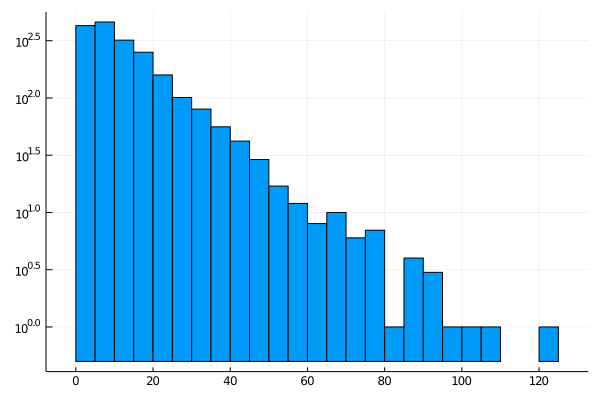

In [2]:
## analyze results
default(legend = false)
histogram(tCapture, yaxis=:log)